In [9]:
%matplotlib widget 
from Trajectory import Trajectory
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import numpy as np


In [10]:
def generate_circle_points(radius, num_points):
    # circle parallel to xy plane
    points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        points.append([x, y, 0])
    return np.array(points)

def generate_sphere_normals(z, points):
    """
    Generate normals for a sphere with sliced at z
    :param z: z coordinate of the slice (sphere is centered at 0, 0, 0)
    :param points: points on the sphere
    """
    normals = []
    for point in points:
        normals.append([point[0], point[1], z])        
    return np.array(normals) / np.linalg.norm(normals, axis=1)[:, None]

points = generate_circle_points(0.1, 10)
normals = generate_sphere_normals(0.2, points)


In [11]:

def plot_trajectory(traj: Trajectory):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for pose in traj:
        point = pose.position
        orientation = pose.orientation
        x_axis = orientation.apply([1, 0, 0]) / 100
        y_axis = orientation.apply([0, 1, 0]) / 100
        z_axis = orientation.apply([0, 0, 1]) / 100
        ax.quiver(point[0], point[1], point[2], x_axis[0], x_axis[1], x_axis[2], color='r')
        ax.quiver(point[0], point[1], point[2], y_axis[0], y_axis[1], y_axis[2], color='g')
        ax.quiver(point[0], point[1], point[2], z_axis[0], z_axis[1], z_axis[2], color='b')
    ax.scatter(traj.points[:, 0], traj.points[:, 1], traj.points[:, 2])
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')
    ax.set_zlabel('Z [mm]')
    ax.set_aspect('equal')
    plt.show()

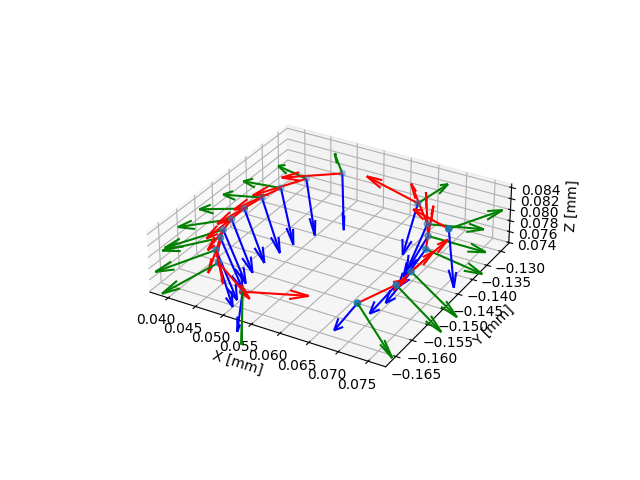

In [12]:
points = np.load("../../trajectory/points.npy")[::4]
normals = np.load("../../trajectory/normals.npy")[::4]
traj = Trajectory(points, normals)
plot_trajectory(traj)
